<a href="https://colab.research.google.com/github/Salah-Front/-pattern-ass-1/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import seaborn as sns

df =  pd.read_csv('Titanic-Dataset.csv')
df.head()
df.shape



(891, 12)

In [35]:
df.info()
df.describe(include='all')
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [41]:
cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df[cols]
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [43]:

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])




In [44]:
from sklearn.preprocessing import OneHotEncoder


df['Sex'] = df['Sex'].map({'male':0, 'female':1})


df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['Age','Fare']
df[num_cols] = scaler.fit_transform(df[num_cols])


In [46]:
X = df.drop('Survived', axis=1)
y = df['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(y_train.value_counts())



Survived
0    439
1    273
Name: count, dtype: int64


In [47]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(class_weight='balanced', random_state=42)

In [61]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       110
           1       0.80      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179

[[98 12]
 [20 49]]


In [62]:
import numpy as np
feat_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feat_imp)


Fare          0.290105
Sex           0.254855
Age           0.253971
Pclass        0.075000
SibSp         0.053984
Parch         0.037507
Embarked_S    0.023536
Embarked_Q    0.011042
dtype: float64


In [50]:
import joblib
joblib.dump(clf, 'titanic_rf_model.joblib')


['titanic_rf_model.joblib']

(60000, 28, 28)
(60000,)


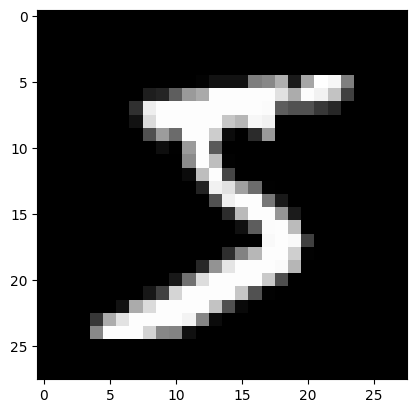

In [51]:
from tensorflow.keras.datasets import mnist

# تحميل الداتا
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)

# شكل صورة واحدة
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')
plt.show()


In [65]:
import tensorflow as tf


# 1) لو الصور ناقصة channel
if len(x_train.shape) == 3:    # (60000, 28, 28)
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)


# 2) Resize إلى 32x32
x_train = tf.image.resize(x_train, (32, 32)).numpy()
x_test = tf.image.resize(x_test, (32, 32)).numpy()

print(x_train.shape)  # هيبقى (60000, 32, 32, 1)





(60000, 32, 32, 1)


In [66]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [54]:
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights = dict(enumerate(class_weights))
print(class_weights)


{0: np.float64(1.0130001688333614), 1: np.float64(0.8899436369029962), 2: np.float64(1.0070493454179255), 3: np.float64(0.978633175664655), 4: np.float64(1.0270455323519343), 5: np.float64(1.1068068622025458), 6: np.float64(1.013856032443393), 7: np.float64(0.9577015163607342), 8: np.float64(1.025465732353444), 9: np.float64(1.0085728693898135)}


In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False
)

datagen.fit(x_train)
